(1536, 1536, 3)
(256, 256, 3)


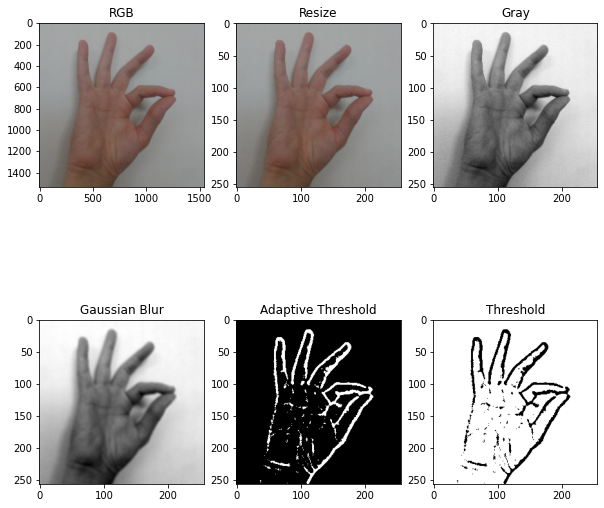

In [ ]:
  import glob
import cv2
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,3,figsize=(10,10))
# f.set_size_inches(10, 10)

#Read Image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/before preprocessing/F/F (2).jpg',-1)
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax[0,0].set_title('RGB')
ax[0,0].imshow(img)

#Image Resize
re = cv2.resize(img, (256,256))
print(re.shape)
ax[0,1].set_title('Resize')
ax[0,1].imshow(re,cmap='gray')

gray = cv2.cvtColor(re, cv2.COLOR_RGB2GRAY)
ax[0,2].set_title('Gray')
ax[0,2].imshow(gray,cmap='gray')

gaus = cv2.GaussianBlur(gray,(5,5),2)
ax[1,0].set_title('Gaussian Blur')
ax[1,0].imshow(gaus,cmap='gray')

adath = cv2.adaptiveThreshold(gaus,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
ax[1,1].set_title('Adaptive Threshold')
ax[1,1].imshow(adath,cmap='gray')

ret, thr = cv2.threshold(adath, 70, 255, cv2. +cv2.THRESH_OTSU)
ax[1,2].set_title('Threshold')
ax[1,2].imshow(thr,cmap='gray')

In [ ]:
import cv2
import glob
import os


data_path = "/content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/before preprocessing"
imgs = sorted(glob.glob(data_path+"/**/*.*", recursive=True))

n = 256

for i in imgs:
    img = cv2.imread(i, -1)
    re = cv2.resize(img, (n,n))
    class_name = i[i.rfind('/')+1]
    file_name = i[i.rfind('/')+1:].replace('.jpg','')
    img = cv2.cvtColor(re, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gaus = cv2.GaussianBlur(gray,(5,5),2)
    adath = cv2.adaptiveThreshold(gaus,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, thr = cv2.threshold(adath, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    final_path = "/content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/"+class_name+"/"+file_name+".jpg"
    dir = os.path.join("/content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/",class_name)
    if not os.path.exists(dir):
      os.mkdir(dir)
    cv2.imwrite(final_path,thr)
    print("Done: "+final_path)

print(str(len(imgs))+" files completed")

Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (1).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (10).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (11).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (12).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (13).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (14).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (15).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (2).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (3).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (4).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/aft

In [ ]:
import glob
import cv2
import pandas as pd
import numpy as np

imgs = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/**/*.*", recursive=True))

df = pd.DataFrame()

for i in imgs:  
    img = cv2.imread(i, 0)
    arr = np.asarray(img).ravel()
    df = df.append([arr], ignore_index=True)
    print("Done: "+i)
    
print(str(len(imgs))+" files completed")

Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (1).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (10).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (11).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (12).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (13).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (14).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (15).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (2).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (3).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/after preprocessing/A/A (4).jpg
Done: /content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/aft

In [ ]:
pList = []

for i in range(1,256*256+1):
  pList.append('P'+str(i))

df.columns = pList

labels = []

n=0

for i in range(25):
  for j in range(15):
    if i==9:
      continue
    labels.append(n)
  n=n+1

df.insert(0,'Label',labels)

In [ ]:
df

,Label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,...,P65497,P65498,P65499,P65500,P65501,P65502,P65503,P65504,P65505,P65506,P65507,P65508,P65509,P65510,P65511,P65512,P65513,P65514,P65515,P65516,P65517,P65518,P65519,P65520,P65521,P65522,P65523,P65524,P65525,P65526,P65527,P65528,P65529,P65530,P65531,P65532,P65533,P65534,P65535,P65536
0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
1,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
2,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,253,255,255,253,255,252,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3,0,255,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
4,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,24,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
356,24,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
357,24,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
358,24,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,Label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,...,P65497,P65498,P65499,P65500,P65501,P65502,P65503,P65504,P65505,P65506,P65507,P65508,P65509,P65510,P65511,P65512,P65513,P65514,P65515,P65516,P65517,P65518,P65519,P65520,P65521,P65522,P65523,P65524,P65525,P65526,P65527,P65528,P65529,P65530,P65531,P65532,P65533,P65534,P65535,P65536
0,11,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
1,15,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
2,2,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3,23,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
4,7,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,15,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
356,23,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
357,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
358,16,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/Our_Dataset.csv',index=False)